In [51]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import matplotlib.patches as patches
%matplotlib notebook

In [15]:
# Load preprocessed data and targets
data = pd.read_csv('../data/train/00001/columns_1000ms.csv')
targets = pd.read_csv('../data/train/00001/targets.csv')

In [16]:
data

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,video_hallway_bb_3d_flt_y_min,video_hallway_bb_3d_flt_y_median,video_hallway_bb_3d_flt_y_max,video_hallway_bb_3d_flt_y_sum,video_hallway_bb_3d_flt_z_mean,video_hallway_bb_3d_flt_z_std,video_hallway_bb_3d_flt_z_min,video_hallway_bb_3d_flt_z_median,video_hallway_bb_3d_flt_z_max,video_hallway_bb_3d_flt_z_sum
0,0.939200,0.012238,0.896,0.944,0.952,18.784,-0.279700,0.007022,-0.292,-0.280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.938000,0.010881,0.904,0.943,0.946,18.760,-0.281400,0.008200,-0.298,-0.282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.940400,0.010461,0.910,0.942,0.952,18.808,-0.276400,0.005713,-0.286,-0.276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.944100,0.005272,0.926,0.944,0.954,18.882,-0.268300,0.008057,-0.282,-0.270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.942400,0.011430,0.902,0.945,0.952,18.848,-0.260300,0.025685,-0.282,-0.266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.925700,0.046529,0.878,0.903,1.026,18.514,-0.355400,0.043235,-0.456,-0.355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,0.914500,0.015734,0.892,0.911,0.944,18.290,-0.363900,0.024662,-0.398,-0.368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1821,0.913800,0.024404,0.848,0.919,0.952,18.276,-0.347200,0.013746,-0.372,-0.345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1822,0.925200,0.057881,0.806,0.932,1.020,18.504,-0.356800,0.101979,-0.644,-0.340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Make a dataframe with just the 2d video bounding box values
boundings = data[['video_hallway_bb_2d_br_y_mean', 
             'video_hallway_bb_2d_tl_y_mean',
             'video_hallway_bb_2d_br_x_mean',
             'video_hallway_bb_2d_tl_x_mean',
             'video_kitchen_bb_2d_br_y_mean', 
             'video_kitchen_bb_2d_tl_y_mean',
             'video_kitchen_bb_2d_br_x_mean',
             'video_kitchen_bb_2d_tl_x_mean',
             'video_living_room_bb_2d_br_y_mean', 
             'video_living_room_bb_2d_tl_y_mean',
             'video_living_room_bb_2d_br_x_mean',
             'video_living_room_bb_2d_tl_x_mean']]

In [6]:
boundings

,video_hallway_bb_2d_br_y_mean,video_hallway_bb_2d_tl_y_mean,video_hallway_bb_2d_br_x_mean,video_hallway_bb_2d_tl_x_mean,video_kitchen_bb_2d_br_y_mean,video_kitchen_bb_2d_tl_y_mean,video_kitchen_bb_2d_br_x_mean,video_kitchen_bb_2d_tl_x_mean,video_living_room_bb_2d_br_y_mean,video_living_room_bb_2d_tl_y_mean,video_living_room_bb_2d_br_x_mean,video_living_room_bb_2d_tl_x_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Labels

In [41]:
# Create list of labels for each 1 second interval using argmax on the targets from the annotators
labels = []
for i in range(len(targets)):
    
    # Determine the index of the label which has the largest target value in the list of actions
    label_ind = np.argmax(targets.iloc[i][2:])
    
    if label_ind == -1:
        label = 'Unknown'
        
    # If not unknown, assign to label the name of the column which has the largest target value
    else:
        label = targets.columns[label_ind + 2]
        
    labels.append(label)

In [42]:
print(labels[:100])

['Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'a_walk', 'a_walk', 'a_walk', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'a_walk', 'a_walk', 'a_walk', 'a_walk', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 't_turn', 't_turn', 'p_stand', 'p_stand', 'p_stand', 'p_stand', 'p_stan

## Animation

In [64]:
def init():
    """ Initialise the figure """
    line.set_data([], [])
    return line,

def animate(i):
    """ Generate each frame of the animation """
    bb_indexes = np.where(np.isnan(boundings.iloc[i])==False)[0]
    if bb_indexes.size > 0:
        
        
        bbs = boundings.iloc[i][bb_indexes]
        
        if bb_indexes[0] == 0:
            green_rec = patches.Rectangle((0,0), 640, 480, color='mediumseagreen')
            ax.add_patch(green_rec)
            title = 'hallway'
    
        elif bb_indexes[0] == 4:
            blue_rec = patches.Rectangle((0,0), 640, 480, color='skyblue')
            ax.add_patch(blue_rec)
            title = 'kitchen'
        
        elif bb_indexes[0] == 8:
            blue_rec = patches.Rectangle((0,0), 640, 480, color='lightpink')
            ax.add_patch(blue_rec)
            title = 'living room'
    
        x_vals = [bbs[2],bbs[2],bbs[3],bbs[3],bbs[2]]
        y_vals = [bbs[0],bbs[1],bbs[1],bbs[0],bbs[0]]

        
        line.set_data(x_vals, y_vals)
        line.set_color('black')
        plt.title(title)
        plt.xlabel(labels[i])
    else:
        line.set_data([],[])
    return line,

def animate_photo(i):
    """ Generate each frame of the animation """
    bb_indexes = np.where(np.isnan(boundings.iloc[i])==False)[0]
    if bb_indexes.size > 0:
        
        
        bbs = boundings.iloc[i][bb_indexes]
        
        if bb_indexes[0] == 0:
            back_im = image.imread('../data/supplementary/hallway.png')
            ax.imshow(back_im, extent=(0, 320, 240, 0))
            title = 'hallway'
    
        elif bb_indexes[0] == 4:
            back_im = image.imread('../data/supplementary/kitchen.png')
            ax.imshow(back_im, extent=(0, 320, 240, 0))
            title = 'kitchen'
        
        elif bb_indexes[0] == 8:
            back_im = image.imread('../data/supplementary/living_room.png')
            ax.imshow(back_im, extent=(0, 320, 240, 0))
            title = 'living room'
    
        x_vals = [bbs[2],bbs[2],bbs[3],bbs[3],bbs[2]]
        y_vals = [bbs[0],bbs[1],bbs[1],bbs[0],bbs[0]]

        
        line.set_data(x_vals, y_vals)
        line.set_color('black')
        plt.title(title)
        plt.xlabel(labels[i])
    else:
        line.set_data([],[])
    return line,

In [68]:
def make_figure():
    """ Set the figure for the animation """
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 320), ylim=(0, 240))
    plt.gca().invert_yaxis()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    line, = ax.plot([], [], lw=3)
    
    return fig, ax, line,

def make_animation(fig, ax, line,):
    """ Produce the animation """

    # frames = number of frames in animation, interval = time between frames in ms
    anim = FuncAnimation(fig, animate_photo, init_func=init,
                         frames=1000, interval=100, blit=True)
    return anim

<IPython.core.display.Javascript object>


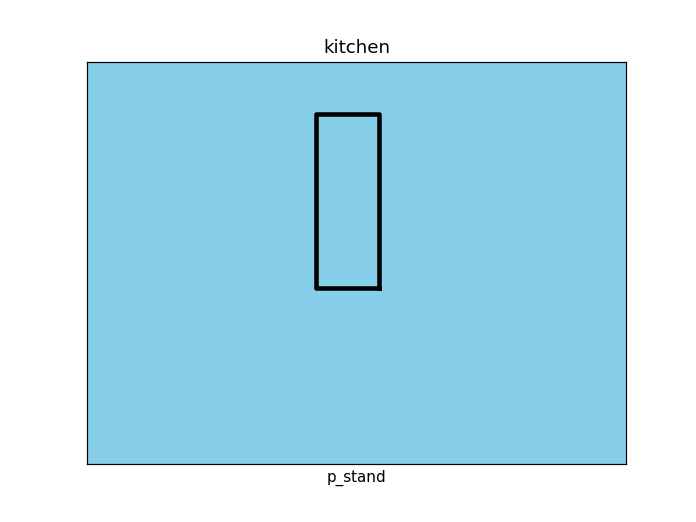

In [45]:
fig, ax, line, = make_figure()
anim = make_animation(fig, ax, line,)

In [17]:
HTML(anim.to_html5_video())

In [46]:
mywriter = animation.FFMpegWriter(fps=10)
anim.save('bounding_box1.mp4',writer=mywriter)

<IPython.core.display.Javascript object>


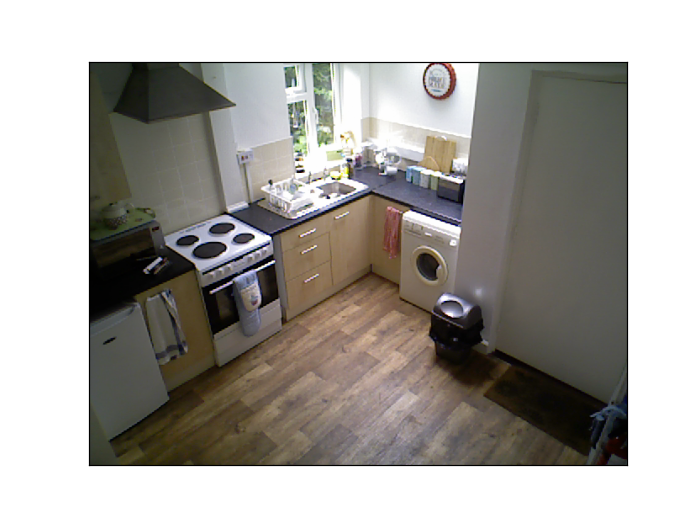

[]

In [63]:
back_im = image.imread('../data/supplementary/kitchen.png')
fig = plt.figure()
ax = plt.axes(xlim=(0, 320), ylim=(0,240))
plt.gca().invert_yaxis()
ax.imshow(back_im, extent=(0,320, 240,0))
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

<IPython.core.display.Javascript object>


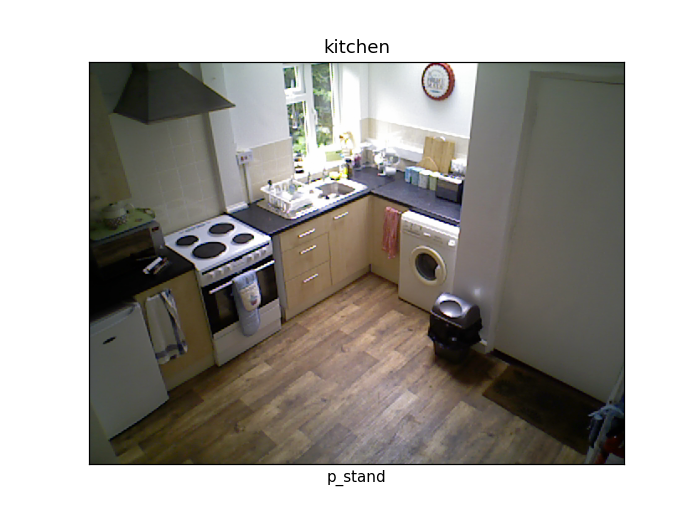

In [69]:
fig, ax, line, = make_figure()
anim = make_animation(fig, ax, line,)

In [70]:
HTML(anim.to_html5_video())